# Angular kinematics in a plane (2D)

Marcos Duarte

Human motion is a combination of linear and angular movement and occurs in the three-dimensional (3D) space. For certain movements and depending on the desired or needed degree of detail for the motion analysis, it's possible to perform a two-dimensional (2D, planar) analysis at the main plane of movement. Such simplification is appreciated because the instrumentation and analysis are much more complicated in order to measure 3D motion than for the 2D case.   

For the planar case, the calculation of angles is reduced to the application of trigonometry to the kinematic data. For instance, given the coordinates in a plane of markers on a segment as shown in the figure below, the angle of the segment can be calculated using the inverse function of sin, cos, or tan.

<div class='center-align'><figure><img src="./../images/segment.png" width=250/><figcaption><figcaption><center><i>Figure. A segment in a plane and its coordinates.</i></center></figcaption> </figure></div>

For better numerical accuracy (and also to distinguish values in the whole quadrant), the inverse function of tan is preferred.   
For the data shown in the previous figure:   

$$ \theta = arctan\left(\frac{y_2-y_1}{x_2-x_1}\right) $$

In computer programming (here, Python/Numpy) this is calculated using: `numpy.arctan((y2-y1)/(x2-x1))`. However, for the previous figure the function `arctan` can not distinguish if the segment is at 45$^o$ or at 225$^o$, `arctan` will return the same value. Because this, the function `numpy.arctan2(y, x)` is used, but be aware that `arctan2` will return angles between $[-\pi,\pi]$:

In [1]:
# Import the necessary libraries
import numpy as np
from IPython.display import display, Latex
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2, "lines.markersize": 8})

In [2]:
x1, y1 = 0, 0
x2, y2 = 1, 1

display(Latex('Segment at 45$^o$:'))
angs = [ np.arctan((1-0)/(1-0))*180/np.pi, np.arctan2(1-0, 1-0)*180/np.pi ]
display(Latex('Using arctan: '+str(angs[0])+'$\quad$'+'Using arctan2: '+str(angs[1])))
display(Latex('Segment at 225$^o$:'))
angs = [ np.arctan((-1-0)/(-1-0))*180/np.pi, np.arctan2(-1-0, -1-0)*180/np.pi ]
display(Latex('Using arctan: '+str(angs[0])+'$\quad$'+'Using arctan2: '+str(angs[1])))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

And Numpy has a function to convert an angle in rad to degrees and the other way around:

In [3]:
print('np.rad2deg(np.pi/2) =', np.rad2deg(np.pi))
print('np.deg2rad(180) =', np.deg2rad(180))

np.rad2deg(np.pi/2) = 180.0
np.deg2rad(180) = 3.14159265359


Let's simulate a 2D motion of the arm performing two complete turns around the shoulder to exemplify the use of `arctan2`:

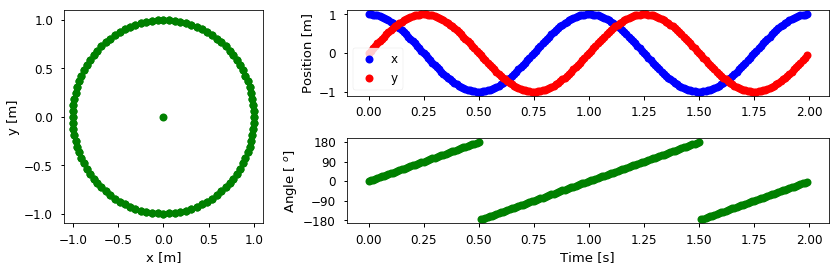

In [4]:
t = np.arange(0, 2, 0.01)
x = np.cos(2*np.pi*t)
y = np.sin(2*np.pi*t)
ang = np.arctan2(y, x)*180/np.pi

plt.figure(figsize=(12, 4))
hax1 = plt.subplot2grid((2, 3), (0, 0), rowspan=2)
hax1.plot(x, y, 'go')
hax1.plot(0, 0, 'go')
hax1.set_xlabel('x [m]')
hax1.set_ylabel('y [m]')
hax1.set_xlim([-1.1, 1.1])
hax1.set_ylim([-1.1, 1.1])
hax2 = plt.subplot2grid((2, 3), (0, 1), colspan=2)
hax2.plot(t, x, 'bo', label='x')
hax2.plot(t, y, 'ro', label='y')
hax2.legend(numpoints=1, frameon=True, framealpha=.8)
hax2.set_ylabel('Position [m]')
hax2.set_ylim([-1.1, 1.1])
hax3 = plt.subplot2grid((2, 3), (1, 1), colspan=2)
hax3.plot(t, ang, 'go')
hax3.set_yticks(np.arange(-180, 181, 90))
hax3.set_xlabel('Time [s]')
hax3.set_ylabel('Angle [ $^o$]')
plt.tight_layout()

Because the output of the `arctan2` is bounded to $[-\pi,\pi]$, the angle measured appears chopped in the figure. This problem can be solved using the function `numpy.unwrap`, which detects sudden jumps in the angle and corrects that:

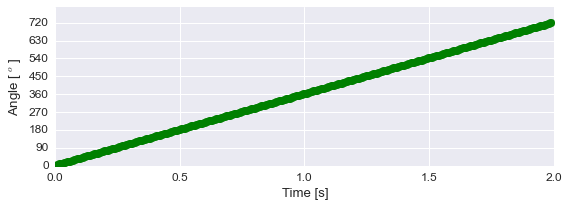

In [5]:
ang = np.unwrap(np.arctan2(y, x))*180/np.pi

hfig, hax = plt.subplots(1,1, figsize=(8,3))
hax.plot(t, ang, 'go')
hax.set_yticks(np.arange(start=0, stop=721, step=90))
hax.set_xlabel('Time [s]')
hax.set_ylabel('Angle [ $^o$]')
plt.tight_layout()

If now we want to measure the angle of a joint (i.e., the angle of a segment in relation to other segment) we just have to subtract the two segment angles (but this is correct only if the angles are at the same plane):

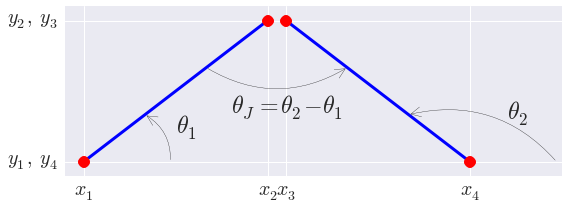

In [6]:
x1, y1 = 0.0, 0.0
x2, y2 = 1.0, 1.0 
x3, y3 = 1.1, 1.0
x4, y4 = 2.1, 0.0

hfig, hax = plt.subplots(1,1, figsize=(8,3))
hax.plot((x1,x2), (y1,y2), 'b-', (x1,x2), (y1,y2), 'ro', linewidth=3, markersize=12)
hax.add_patch(matplotlib.patches.FancyArrowPatch(posA=(x1+np.sqrt(2)/3, y1),
                                                 posB=(x2/3, y2/3),\
      arrowstyle='->,head_length=10,head_width=5', connectionstyle='arc3,rad=0.3'))
plt.text(1/2, 1/5, '$\\theta_1$', fontsize=24)
hax.plot((x3,x4), (y3,y4), 'b-', (x3,x4), (y3,y4), 'ro', linewidth=3, markersize=12)
hax.add_patch(matplotlib.patches.FancyArrowPatch(posA=(x4+np.sqrt(2)/3, y4),
                                                 posB=(x4-1/3, y4+1/3),\
      arrowstyle='->,head_length=10,head_width=5', connectionstyle='arc3,rad=0.3'))
hax.xaxis.set_ticks((x1,x2,x3,x4))
hax.yaxis.set_ticks((y1,y2,y3,y4))
hax.xaxis.set_ticklabels(('$x_1$','$x_2$','$x_3$','$x_4$'), fontsize=20)
hax.yaxis.set_ticklabels(('$y_1,\,y_4$','$y_2,\,y_3$'), fontsize=20)
plt.text(x4+.2,y4+.3,'$\\theta_2$', fontsize=24)
hax.add_patch(matplotlib.patches.FancyArrowPatch(posA=(x2-1/3, y2-1/3),
                                                 posB=(x3+1/3, y3-1/3),\
      arrowstyle='->,head_length=10,head_width=5', connectionstyle='arc3,rad=0.3'))
plt.text(x1+.8,y1+.35,'$\\theta_J=\\theta_2-\\theta_1$', fontsize=24)
hax.set_xlim(min([x1,x2,x3,x4])-0.1, max([x1,x2,x3,x4])+0.5)
hax.set_ylim(min([y1,y2,y3,y4])-0.1, max([y1,y2,y3,y4])+0.1)
hax.grid(xdata=(0,1), ydata=(0,1))
plt.tight_layout()

The joint angle shown above is simply the difference between the adjacent segment angles:

In [7]:
x1, y1, x2, y2 = 0, 0, 1, 1 
x3, y3, x4, y4 = 1.1, 1, 2.1, 0
ang1 = np.arctan2(y2-y1, x2-x1)*180/np.pi
ang2 = np.arctan2(y3-y4, x3-x4)*180/np.pi

#print('Angle 1:', ang1, '\nAngle 2:', ang2, '\nJoint angle:', ang2-ang1)
display(Latex('$\\theta_1=\;$' + str(ang1) + '$^o$'))
display(Latex('$\\theta_2=\;$' + str(ang2) + '$^o$'))
display(Latex('$\\theta_J=\;$' + str(ang2-ang1) + '$^o$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

The following convention is commonly used to describe the knee and ankle joint angles at the sagittal plane (figure from Winter 2005):

<div class='center-align'><figure><img src='./../images/jointangles.png' width=350 alt='Joint angle convention'/> <figcaption><center><i>Figure. Convention for the sagital joint angles of the lower limb (from Winter, 2009).</i></center></figcaption></figure></div>

## Angle between two 3D vectors

In certain cases, we have access to the 3D coordinates of markers but we just care for the angle between segments in the plane defined by these segments (but if there is considerable movement in different planes, this simple 2D angle might give unexpected results).   
Consider that `p1` and `p2` are the 3D coordinates of markers placed on segment 1 and `p2` and `p3` are the 3D coordinates of the markers on segment 2.    

To determine the 2D angle between the segments, one can use the definition of the dot product:

$$ \mathbf{a} \cdot \mathbf{b} = ||\mathbf{a}||\:||\mathbf{b}||\:cos(\theta)\;\;\; \Rightarrow \;\;\; angle = arccos\left(\frac{dot(p2-p1,\;p3-p2)}{norm(p2-p1)*norm(p3-p2)\;\;\;\;\;} \right) $$

Or using the definition of the cross product:

$$ \mathbf{a} \times \mathbf{b} = ||\mathbf{a}||\:||\mathbf{b}||\:sin(\theta) \;\; \Rightarrow \;\; angle = arcsin\left(\frac{cross(p2-p1,\;p3-p2)}{norm(p2-p1)*norm(p3-p2)\;\;\;\;\;} \right) $$

But because `arctan2` has a better numerical accuracy, combine the dot and cross products, and in Python notation:
```python
angle = np.arctan2(np.linalg.norm(np.cross(p1-p2, p4-p3)), np.dot(p1-p2, p4-p3))
```
See [this notebook](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/ScalarVector.ipynb) for a review on the mathematical functions cross product and scalar product.

We can use the formula above for the angle between two 3D vectors to calculate the joint angle even with the 2D vectors we calculated before:

In [8]:
p1, p2 = np.array([0, 0]),   np.array([1, 1])    # segment 1
p3, p4 = np.array([1.1, 1]), np.array([2.1, 0])  # segment 2

angle = np.arctan2(np.linalg.norm(np.cross(p1-p2, p4-p3)), np.dot(p1-p2, p4-p3))*180/np.pi

print('Joint angle:', '{0:.1f}'.format(angle))

Joint angle: 90.0


As expected, the same result.  

In Numpy, if the third components of vectors are zero, we don't even need to type them; Numpy takes care of adding zero as the third component for the cross product.

## Angular position, velocity, and acceleration

The angular position is a vector, its direction is given by the perpendicular axis to the plane where the angular position is described, and the motion if it occurs it's said to occur around this axis.

Angular velocity is the rate (with respect to time) of change of the angular position:

$$ \mathbf{\omega}(t) = \frac{\mathbf{\theta}(t_2)-\mathbf{\theta}(t_1)}{t_2-t_1} = \frac{\Delta \mathbf{\theta}}{\Delta t}$$

$$ \mathbf{\omega}(t) = \frac{d\mathbf{\theta}(t)}{dt} $$

Angular acceleration is the rate (with respect to time) of change of the angular velocity, which can also be given by the second-order rate of change of the angular position:

$$ \mathbf{\alpha}(t) = \frac{\mathbf{\omega}(t_2)-\mathbf{\omega}(t_1)}{t_2-t_1} = \frac{\Delta \mathbf{\omega}}{\Delta t} = \frac{\Delta^2 \mathbf{\theta}}{\Delta t^2}$$

Likewise, angular acceleration is the first-order derivative of the angular velocity or the second-order derivative of the angular position vector:   

$$ \mathbf{\alpha}(t) = \frac{d\mathbf{\omega}(t)}{dt} = \frac{d^2\mathbf{\theta}(t)}{dt^2} $$

The direction of the angular velocity and acceleration vectors is the same as the angular position (perpendicular to the plane of rotation) and the sense is given by the right-hand rule.

### The antiderivative

As the angular acceleration is the derivative of the angular velocity which is the derivative of angular position, the inverse mathematical operation is the [antiderivative](http://en.wikipedia.org/wiki/Antiderivative) (or integral):

$$ \mathbf{\theta}(t) = \mathbf{\theta}_0 + \int \mathbf{\omega}(t) dt $$

$$ \mathbf{\omega}(t) = \mathbf{\omega}_0 + \int \mathbf{\alpha}(t) dt $$

## Relationship between linear and angular kinematics

Consider a particle rotating around a point at a fixed distance `r` (circular motion), as the particle moves along the circle, it travels an arc of length `s`.   
The angular position of the particle is:

$$ \theta = \frac{s}{r} $$

Which is in fact similar to the definition of the angular measure radian:

<div class='center-align'><figure><img src='http://upload.wikimedia.org/wikipedia/commons/thumb/3/3d/Radian_cropped_color.svg/220px-Radian_cropped_color.svg.png' width=200/><figcaption><center><i>Figure. An arc of a circle with the same length as the radius of that circle corresponds to an angle of 1 radian (<a href="https://en.wikipedia.org/wiki/Radian">image from Wikipedia</a>).</i></center></figcaption></figure></div>

Then, the distance travelled by the particle is the arc length:

$$ s = r\theta $$

As the radius is constant, the relation between linear and angular velocity and acceleration is straightfoward:

$$ v = \frac{ds}{dt} = r\frac{d\theta}{dt} = r\omega $$

$$ a = \frac{dv}{dt} = r\frac{d\omega}{dt} = r\alpha $$

## Problems

1. A gymnast performs giant circles around the horizontal bar (with the official dimensions for  Artistic Gymnastics) at a constant rate of one circle every 2 s and consider that his center of mass is 1 m distant from the bar. At the lowest point (exactly beneath the bigh bar), the gymnast releases the bar, moves forward, and lands standing on the ground.   
 a) Calculate the angular and lineat velocity of the gymnast's center of mass at the point of release.  
 b) Calculate the horizontal distance travelled by the gymnast's center of mass.  

2. With the data from Table A1 of Winter (2009) and the convention for the sagital joint angles of the lower limb:   
 a. Calculate and plot the angles of the foot, leg, and thigh segments.   
 b. Calculate and plot the angles of the ankle, knee, and hip joint.   
 c. Calculate and plot the velocities and accelerations for the angles calculated in B. 
 d. Compare the ankle angle using the two different conventions described by Winter (2009), that is, defining the foot segment with the MT5 or the TOE marker.  
 e. Knowing that a stride period corresponds to the data between frames 1 and 70 (two subsequents toe-off by the right foot), can you suggest a possible candidate for automatic determination of a stride? Hint: look at the vertical displacement and acceleration of the heel marker.  
 
 [Clik here for the data from Table A.1 (Winter, 2009)](./../data/WinterTableA1.txt) from [Winter's book student site](http://bcs.wiley.com/he-bcs/Books?action=index&bcsId=5453&itemId=0470398183).  
 
 Example: load data and plot the markers' positions:

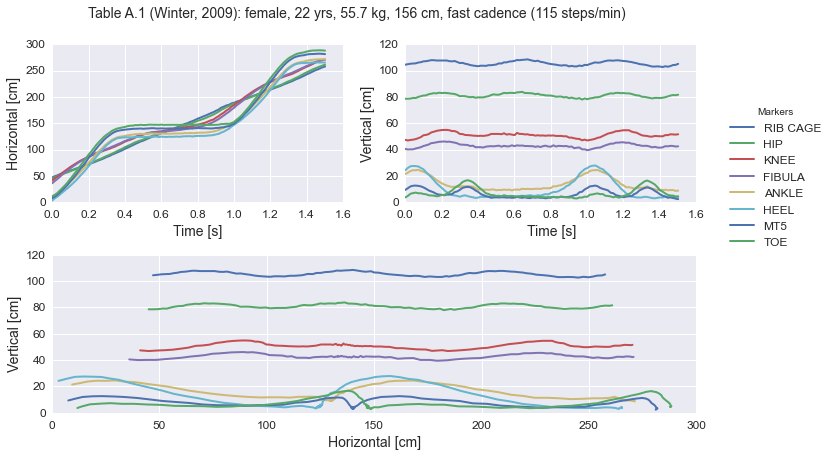

In [9]:
filename = './../data/WinterTableA1.txt'
data = np.loadtxt(filename, skiprows=2, unpack=False)
markers = ['RIB CAGE', 'HIP', 'KNEE', 'FIBULA', 'ANKLE', 'HEEL', 'MT5', 'TOE']

fig = plt.figure(figsize=(10, 6))

ax = plt.subplot2grid((2,2),(0, 0))
ax.plot(data[: ,1], data[:, 2::2])
ax.set_xlabel('Time [s]', fontsize=14)
ax.set_ylabel('Horizontal [cm]', fontsize=14)

ax = plt.subplot2grid((2, 2),(0, 1))
ax.plot(data[: ,1], data[:, 3::2])
ax.set_xlabel('Time [s]', fontsize=14)
ax.set_ylabel('Vertical [cm]', fontsize=14)

ax = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax.plot(data[:, 2::2], data[:, 3::2])
ax.set_xlabel('Horizontal [cm]', fontsize=14)
ax.set_ylabel('Vertical [cm]', fontsize=14)
plt.suptitle('Table A.1 (Winter, 2009): female, 22 yrs, 55.7 kg, 156 cm, ' \
             'fast cadence (115 steps/min)', y=1.02, fontsize=14)
ax.legend(markers, loc="upper right", bbox_to_anchor=(1.21, 2), title='Markers')
plt.tight_layout()

## References

- Winter DA (2009) [Biomechanics and motor control of human movement](http://books.google.com.br/books?id=_bFHL08IWfwC). 4th edition. Hoboken, EUA: Wiley.